In [1]:
import numpy as np
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
import os
import ROOT
from ROOT import gSystem, gInterpreter
import approximator.particles_trajectory_generator as ptg
import approximator.runner as ap_runnner
import data.bunch_configuration as buc
import visualization.optics_parameter_visualisation as opv
import approximator.optics_parameters as op

sns.set_style("whitegrid")

home = "/home/rafalmucha/Pobrane/optic/"
file_name = "parametrization_6500GeV_0p4_185_reco"
approximator_name = "ip5_to_station_220_h_1_lhcb1"
path_to_project = home+"/optics_generator_python"
path_to_file = home+"/2016/" + file_name + ".root"

Welcome to JupyROOT 6.16/00


In [2]:
approximator = ap_runnner.get_approximator(path_to_project, path_to_file, approximator_name)

Error in <TCling::RegisterModule>: cannot find dictionary module FitCint_rdict.pcm


In [3]:
# Parameters of bunch
x_mean = 0.0
sigma_x = 10e-6
theta_x_mean = 0
sigma_theta_x = 10e-6
y_mean = 0.0
sigma_y = 10e-6
theta_y_mean = 0.00
sigma_theta_y = 10e-6
pt_mean = -0.075
sigma_pt = 0.075

number_of_x_values = 100
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 100

In [4]:
subtitle = file_name + "\n" + approximator_name
plot_size = 5
grid_x_resolution = 5
grid_y_resolution = 7

In [5]:
bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, number_of_x_values,
                                                        theta_x_mean, sigma_theta_x, number_of_theta_x_values,
                                                        y_mean, sigma_y, number_of_y_values,
                                                        theta_y_mean, sigma_theta_y, number_of_theta_y_values,
                                                        pt_mean, sigma_pt, number_of_pt_values)

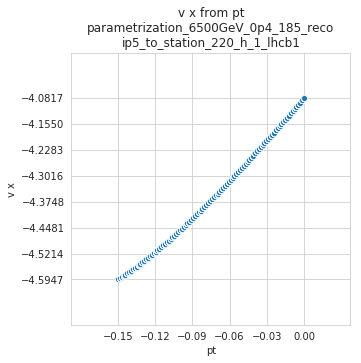

In [6]:
opv.plot_optical_function(approximator, bunch_configuration, op.compute_v_x, "pt", "v x", subtitle)

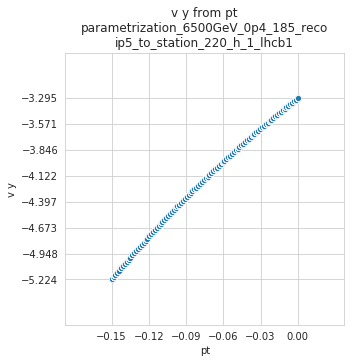

In [7]:
opv.plot_optical_function(approximator, bunch_configuration, op.compute_v_y, "pt", "v y", subtitle)

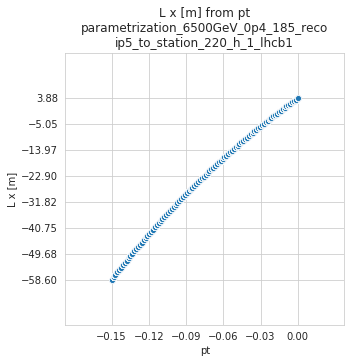

In [8]:
opv.plot_optical_function(approximator, bunch_configuration, op.compute_l_x, "pt", "L x", subtitle, y_unit=" [m]")

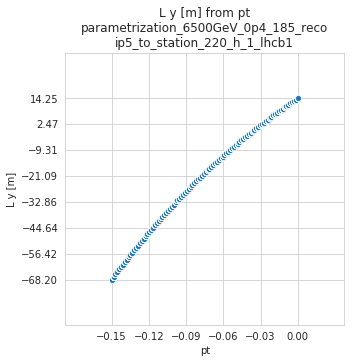

In [9]:
opv.plot_optical_function(approximator, bunch_configuration, op.compute_l_y, "pt", "L y", subtitle, y_unit=" [m]")

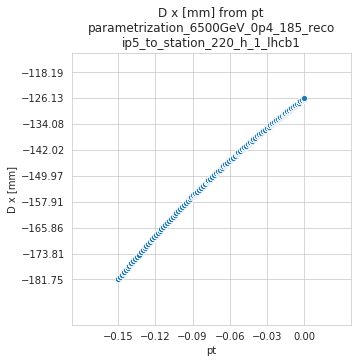

In [10]:
opv.plot_optical_function(approximator, bunch_configuration, op.compute_d_x, "pt", "D x", subtitle, y_unit=" [mm]", y_unit_multiplier=1000)

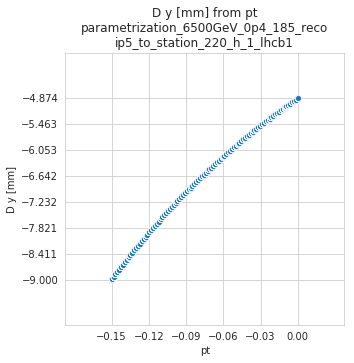

In [11]:
opv.plot_optical_function(approximator, bunch_configuration, op.compute_d_y, "pt", "D y", subtitle, y_unit=" [mm]", y_unit_multiplier=1000)